<a href="https://colab.research.google.com/github/nestrada79/MSDA/blob/main/D207/D207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Statements
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loaded cleaned dataset from csv
df = pd.read_csv('/content/medical_cleaned_V3.csv')

In [3]:
#Verify dataframe has loaded correctly
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.05,17939.40,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.91,17613.00,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.59,17505.19,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.12,12993.44,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.66,3716.53,2,1,3,3,5,3,4,3


# **A. Real-world Organizational Situation or Issue**


## **1. Relevant Question**


> Is there a significant difference in the total charges between patients with different levels of complication_risk?

## **2. Stakeholder Benefits**
**Healthcare Providers (Hospitals, Clinics, Physicians)**<P>

**Resource Allocation:** Understanding the costs involved with treating patients with varying complication risks can help in allocating resources more efficiently.<P>
**Billing Strategy:** If certain risk groups are more expensive to treat, providers might adjust their billing strategies for procedures or treatments commonly associated with those risk levels.<P>
**Treatment Protocols:** Providers can develop or refine treatment protocols and care pathways based on the financial impact and outcomes of treating different risk groups.<P>

**Patients:**<P>

**Informed Decision Making:** Patients can make better-informed decisions about treatments, procedures, or interventions knowing the potential financial implications based on their complication risk.<P>
**Financial Planning:**  Patients can better plan for potential out-of-pocket expenses if they understand how their  risk for complications might impact their total charges.<P>

**Insurance Companies:**<P>

**Policy Pricing:** Insurance companies can adjust policy premiums based on the potential costs associated with treating patients of different complication risk levels. (Not currently legal under the ACA but maybe applicable in other countries)<P>
**Negotiations with Providers:** By understanding the cost dynamics associated with complication risks, insurance companies might negotiate better rates or contracts with healthcare providers.<P>
**Healthcare Policymakers and Regulators:** <P>

**Healthcare Funding:** Policymakers can make informed decisions about healthcare funding allocation based on the financial dynamics of different complication risk levels.<P>
**Regulations and Guidelines:** Regulatory bodies might develop or adjust guidelines, quality metrics, or reimbursement structures based on the findings.<P>


## **3. Relevant Data Identification**
| Variable Name     | Description                                               |
|-------------------|-----------------------------------------------------------|
| TotalCharge       | Represents the total charges for the medical service.     |
| Complication_risk | Indicates the risk level of complications for the patient. |


# **B. Data Analysis Description**


## **1. Data Analysis Code**

One way ANOVA test


> **Null Hypothesis (\(H_0\)):**
>
> \(H_0\): The means of `TotalCharge` are the same across all levels of `Complication_risk`.
>
> **Alternative Hypothesis (\(H_a\)):**
>
> \(H_a\): At least one level of `Complication_risk` has a different mean `TotalCharge` than the others.


In [4]:
# Group data by Complication_risk in the dataframe 'df' and extract TotalCharge for ANOVA analysis
groups = [df['TotalCharge'][df['Complication_risk'] == risk] for risk in df['Complication_risk'].unique()]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)


## **2. Output & Calculation Results**


In [5]:
# Print out the results with a description
print(f"ANOVA Results for TotalCharge grouped by Complication_risk:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Depending on the significance level you're working with (commonly 0.05), you can also add:
if p_value < 0.05:
    print("The results are statistically significant, suggesting there is a difference in TotalCharge among the different complication risks.")
else:
    print("The results are not statistically significant, suggesting there is no difference in TotalCharge among the different complication risks.")


ANOVA Results for TotalCharge grouped by Complication_risk:
F-statistic: 11.6207
P-value: 0.0000
The results are statistically significant, suggesting there is a difference in TotalCharge among the different complication risks.


**ANOVA Results for TotalCharge grouped by Complication_risk**<P>
<P>
**F-statistic** 11.6207<P>
The F-statistic tells us if groups are different from each other.<P>
A higher F statistic indicates the group means are more varied and it's unlikely that the differences are due to random chance.<P>
An F-statistic of 11.6207 is relatively high, suggesting that there's a significant variation in the group means<P>
**P-value**<P>
The P-value is a measure of the evidence against a null hypothesis.<P>
A P-value of 0.0000 means that there is a statistically significant difference in the total charges between the different levels of Complication_risk.<P>
The null hypothesis should be rejected<P>

## **3. Justification for Analysis Technique**


The one way ANOVA test was selected as my objective was to contrast the means of a continuous variable, TotalCharge, among various groups characterized by different levels of Complication_risk.

# **C. Univariate Statistics**


## **1. Distribution of Two Continuous Variables**


**Continuous Variables:** 'TotalCharge' and 'Age' <P>
**Categorical Variables:**'Complication_risk' and 'Gender' <P>

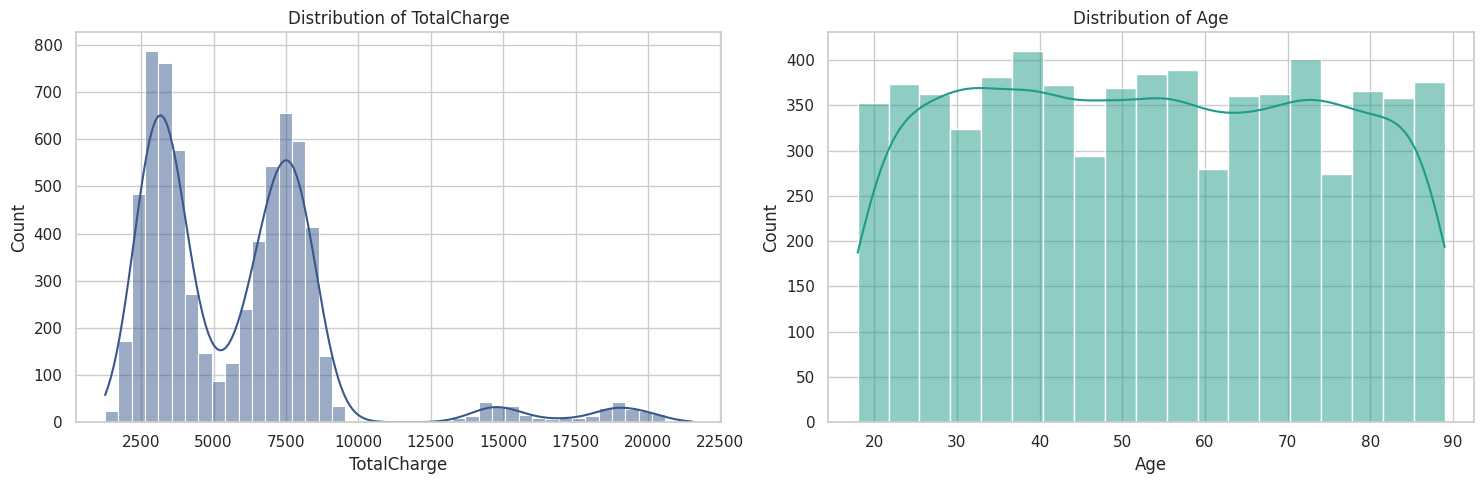

In [6]:
# Select two distinct colors from the 'viridis' palette
colors_from_viridis = sns.color_palette("viridis", 10)
totalcharge_color = colors_from_viridis[2]
age_color = colors_from_viridis[5]

# Set style
sns.set_style("whitegrid")
sns.set_context("notebook")

# Plot distributions for continuous variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Continuous Variable: TotalCharge
sns.histplot(df['TotalCharge'], kde=True, ax=axes[0], color=totalcharge_color)
axes[0].set_title('Distribution of TotalCharge')

# Continuous Variable: Age
sns.histplot(df['Age'], kde=True, ax=axes[1], color=age_color)
axes[1].set_title('Distribution of Age')

# Adjust layout
plt.tight_layout()
plt.show()



## **2. Distribution of Two Categorical Variables**


**Categorical Variables:** 'Complication_risk' and 'Gender'

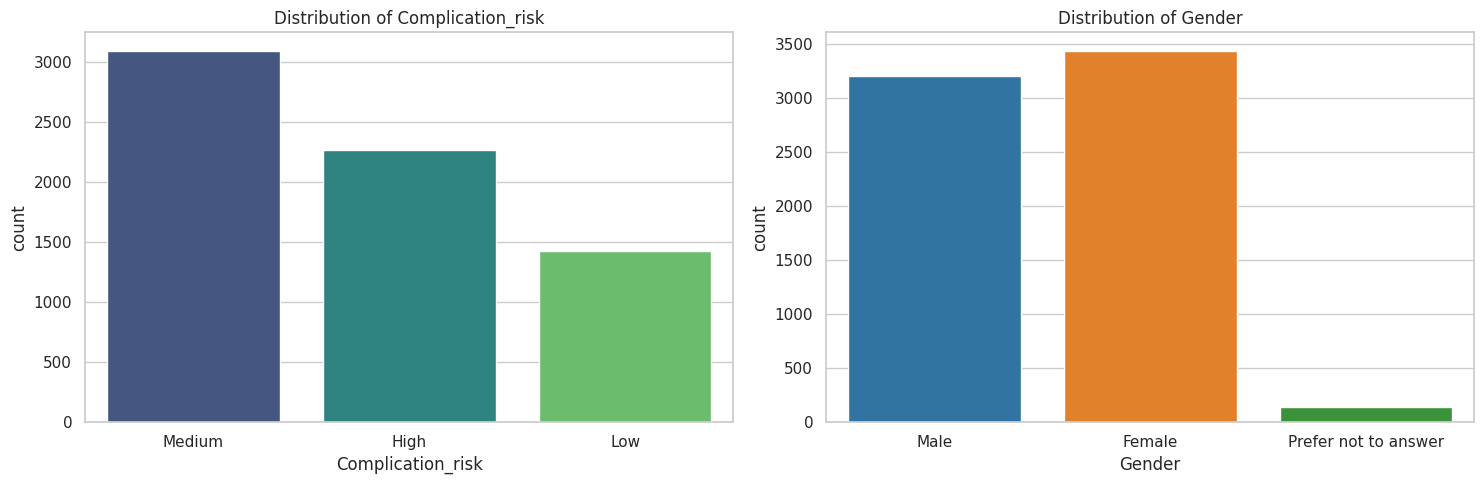

In [7]:
# Categorical Variables: 'Complication_risk' and 'Gender'

sns.set_style("whitegrid")
sns.set_context("notebook")

# Plot distributions for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Categorical Variable: Complication_risk
sns.countplot(x='Complication_risk', data=df, palette='viridis', ax=axes[0])

axes[0].set_title('Distribution of Complication_risk')

# Categorical Variable: Gender
sns.countplot(x='Gender', data=df, ax=axes[1])
axes[1].set_title('Distribution of Gender')

# Adjust layout
plt.tight_layout()
plt.show()


# **D. Bivariate Statistics**


## **1. Distribution of Two Continuous Variables**


**Continuous Variables:** 'TotalCharge' vs 'Age'

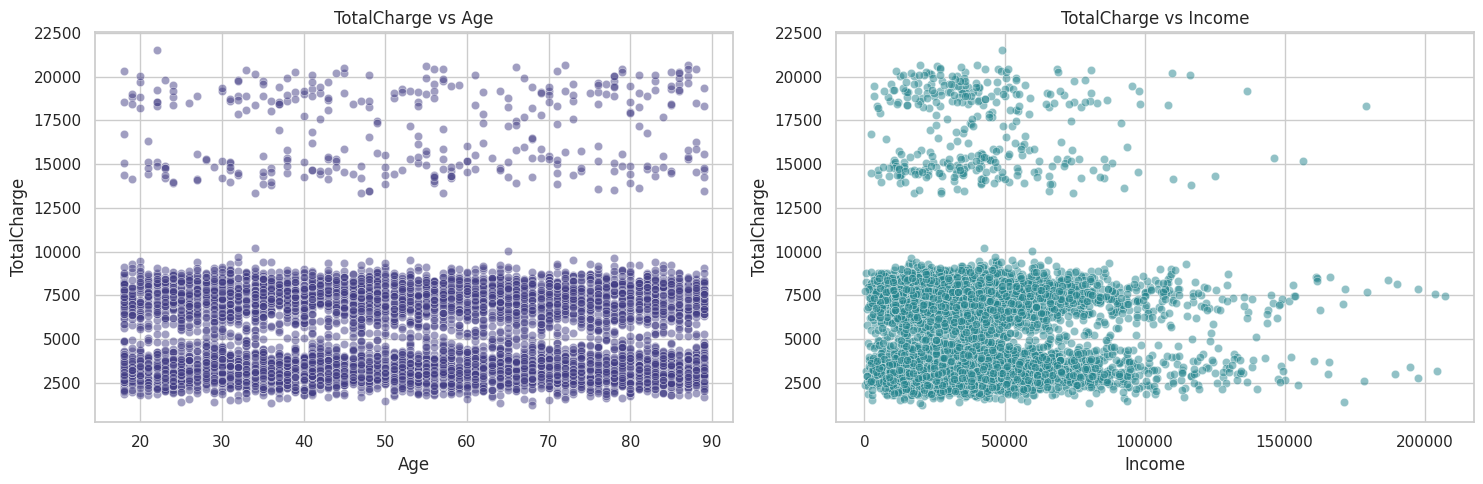

In [8]:
# Set colors from viridis palette
colors_from_viridis = sns.color_palette("viridis", 10)

# Set style
sns.set_style("whitegrid")
sns.set_context("notebook")

# Set up plots for bivariate statistics of continuous variables
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for TotalCharge vs Age
sns.scatterplot(x=df['Age'], y=df['TotalCharge'], ax=axes[0], color=colors_from_viridis[1], alpha=0.5)
axes[0].set_title('TotalCharge vs Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('TotalCharge')

# Scatter plot for TotalCharge vs Income
sns.scatterplot(x=df['Income'], y=df['TotalCharge'], ax=axes[1], color=colors_from_viridis[4], alpha=0.5)
axes[1].set_title('TotalCharge vs Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('TotalCharge')

# Adjust layout
plt.tight_layout()
plt.show()



## **2. Distribution of Two Categorical Variables**

**Complication_risk vs. Gender<P>
Complication_risk vs. Area**

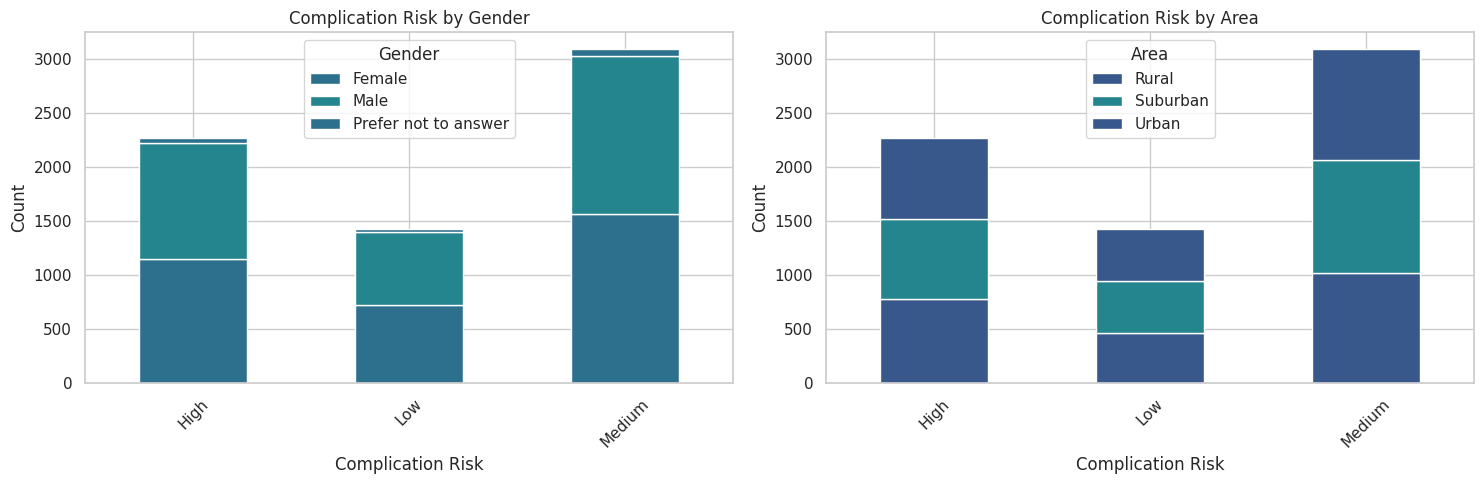

In [9]:
# Create the crosstabs for the categorical variables
crosstab_gender = pd.crosstab(df['Complication_risk'], df['Gender'])
crosstab_area = pd.crosstab(df['Complication_risk'], df['Area'])

# Set up plots for bivariate statistics of categorical variables with "viridis" palette colors
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Stacked bar plot for Complication_risk vs Gender using viridis colors
crosstab_gender.plot(kind='bar', stacked=True, ax=axes[0], color=colors_from_viridis[3:5])
axes[0].set_title('Complication Risk by Gender')
axes[0].set_xlabel('Complication Risk')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Stacked bar plot for Complication_risk vs Area using viridis colors
crosstab_area.plot(kind='bar', stacked=True, ax=axes[1], color=colors_from_viridis[2:5:2])
axes[1].set_title('Complication Risk by Area')
axes[1].set_xlabel('Complication Risk')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


# **E. Implications of Data Analysis**


## **1. Hypothesis Test Results**

The ANOVA test indicated a statistically significant difference in total charges between the different levels of Complication_risk<P>
The null hypothesis should be rejected.

## **2. Limitations**<P>
**Correlation vs. Causation:** The analysis only identifies associations and doesn't imply causation.<P>
**Unaccounted Variables:** There might be other variables not included in the dataset that could influence the results, such as the specific treatments received or the severity of a patient's condition.<P>
**Outliers:** Outliers can skew results.<P>
**Distribution Assumption:** ANOVA assumes that the data for each group is normally distributed and that variances are equal across groups. If these assumptions are violated, the results might not be valid.<P>


## **3. Recommendations**
**Further Investigation:** Investigate other factors that might increase total charges that are not related to complication risks.<P>
**Pricing Strategy:** If certain risk groups are consistently more expensive to treat, billing strategies for insurance plans or medical services could be adjusted to recoup higher costs. (May not be legal in the US under the ACA)<P>
**Patient Counseling:** Advising patients about their medical risk and their association with higher medical bills can help patients make informed decisions regarding their health and budget<P>
**Data Expansion:** To make more informed decisions, it might be beneficial to expand the dataset to include more detailed medical information, treatment specifics, and post-treatment outcomes.<P>

# **F. Panopto Video Recording**

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2bc78a95-9041-4a5e-9b09-b069004fda77

# **G. Code References**

https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/<P>
https://www.statsmodels.org/stable/index.html<P>
https://seaborn.pydata.org/

# **H. Citations & References**

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/<P>
McKinney, Wes. Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference. 2010.